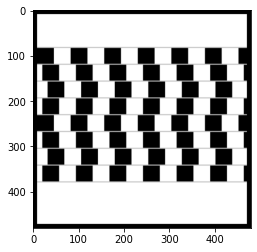

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('checkerboard.png')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im)


Text(0.5, 1.0, 'Gradient in X direction')

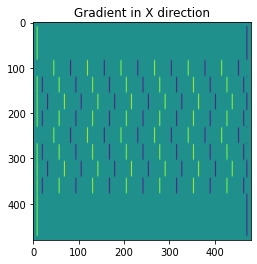

In [2]:
i_x = cv2.Sobel(im_gray, cv2.CV_64F, 1, 0)
plt.imshow(i_x)
plt.title('Gradient in X direction')

Text(0.5, 1.0, 'Gradient in Y direction')

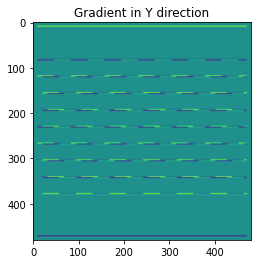

In [3]:
i_y = cv2.Sobel(im_gray, cv2.CV_64F, 0, 1)
plt.imshow(i_y)
plt.title('Gradient in Y direction')

In [4]:
# Calculate the product of derivates in each direction
i_xx = np.multiply(i_x, i_x)
i_xy = np.multiply(i_x, i_y)
i_yy = np.multiply(i_y, i_y)

In [5]:
#Compute second moment matrix M in a Gaussian window around each pixel
s_xx = cv2.GaussianBlur(i_xx, (5,5), 0)
s_xy = cv2.GaussianBlur(i_xy, (5,5), 0)
s_yy = cv2.GaussianBlur(i_yy, (5,5), 0)

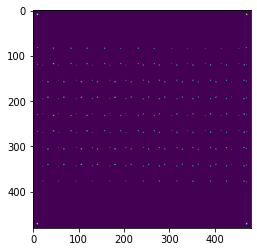

In [6]:
#Compute corner response function R,the response of the detector at each point
k = .04 # Recommended value between .04 and .06
det_h = np.multiply(s_xx, s_yy) - np.multiply(s_xy, s_xy)
trace_h = s_xx + s_yy
R = det_h - k*np.multiply(trace_h, trace_h)

# Threshold R for the image
ratio = .2 # Number to tweak
thresh = abs(R) > ratio * abs(R).max()
plt.imshow(thresh)

In [7]:
# Compute non-maximal supression: Find local maxima of response function

# Get the indexes of the non zero values
non_zero_cords = np.nonzero(thresh)

# Tupled Co-ordinates
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
# Values at the these co-ordinates
values = [abs(R)[i, j] for i, j in tuple_cords]
# Sort the co-ordinates based on the R values
sorted_cords = [tuple_cords[i] for i in np.argsort(values)[::-1]]
# Set Distance to perform NMS
# Any point with this distance of an 
# already selected point will be suppressed
distance = 10 # Number to tweak 
# List to hold the cords after NMS
nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)
print("Number of points detected before NMS = {} ".format(len(thresh)))
print ("Number of points detected after NMS = {} ".format(len(nms_cords)))

Number of points detected before NMS = 480 
Number of points detected after NMS = 209 


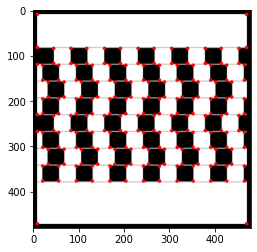

In [8]:
for nms_cord in nms_cords:
    cv2.circle(im, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))